<span style="color:#2e8dc9; font-size:24px; font-weight:700">  Support Vector Machines

In this practice, we will use the same data sets we have used in 
[Linear Discriminant Analysis practice notebook](Linear_Discriminant_Analysis.ipynb)
with the support vector machine classifiers. 
Take a look at that practice first if you haven't done so yet. 

We will start with the first data set that has two linearly separable classes. 

In [1]:
points_data1 <- read.csv("/dsa/data/all_datasets/toydata/data1.csv",header=TRUE)

# For SVM, we need to make sure class is a factor.
points_data1$class <- factor(points_data1$class)
str(points_data1)

'data.frame':	150 obs. of  3 variables:
 $ X    : num  4.92 2.2 2.38 4.37 2.08 ...
 $ Y    : num  3.31 2.76 2.27 2.68 2.19 ...
 $ class: Factor w/ 2 levels "-1","1": 2 2 2 2 2 2 2 2 2 2 ...


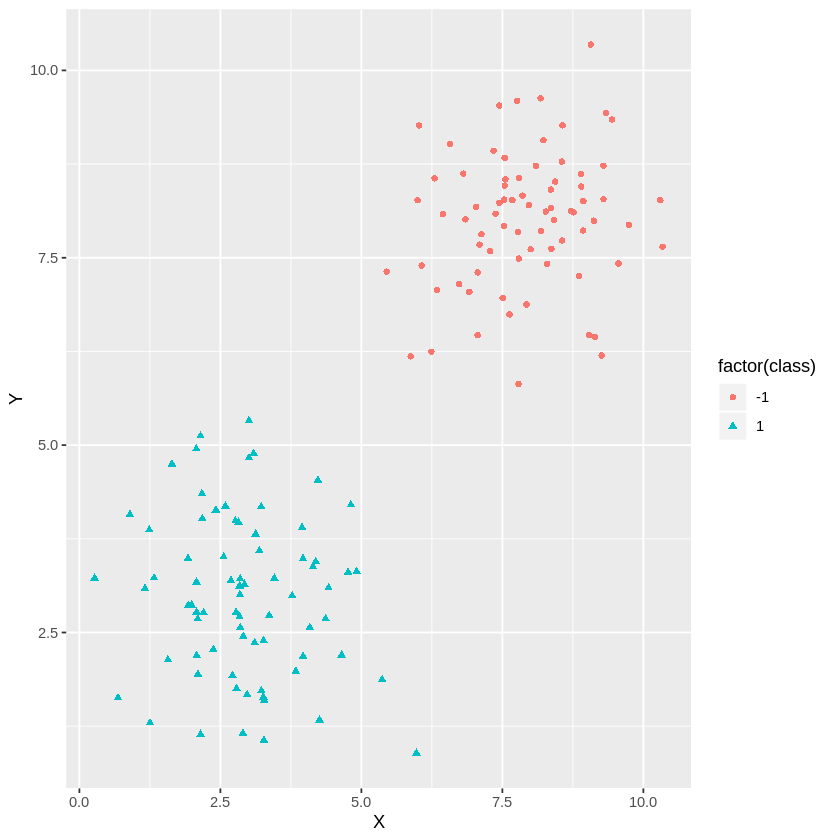

In [2]:
# Visualize the data
library(ggplot2)
plot1 <- ggplot(points_data1, aes(X, Y)) + geom_point(aes(colour=factor(class),shape=factor(class))) #+ theme(legend.position="none")
plot1

The classes labeled as "-1" and "1" are *linearly separable*;
we can draw a linear decision boundary to separate them. 
Let's use  support vector machine (SVM) to do this. 
We will use the library "e1071" for SVMs, and "caret" library (classification and regression training)
that has nice functions to deal with several aspects of classification process.

Loading required package: lattice



Call:
svm(formula = class ~ ., data = points_data1, kernel = "linear", 
    cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  3

 ( 2 1 )


Number of Classes:  2 

Levels: 
 -1 1




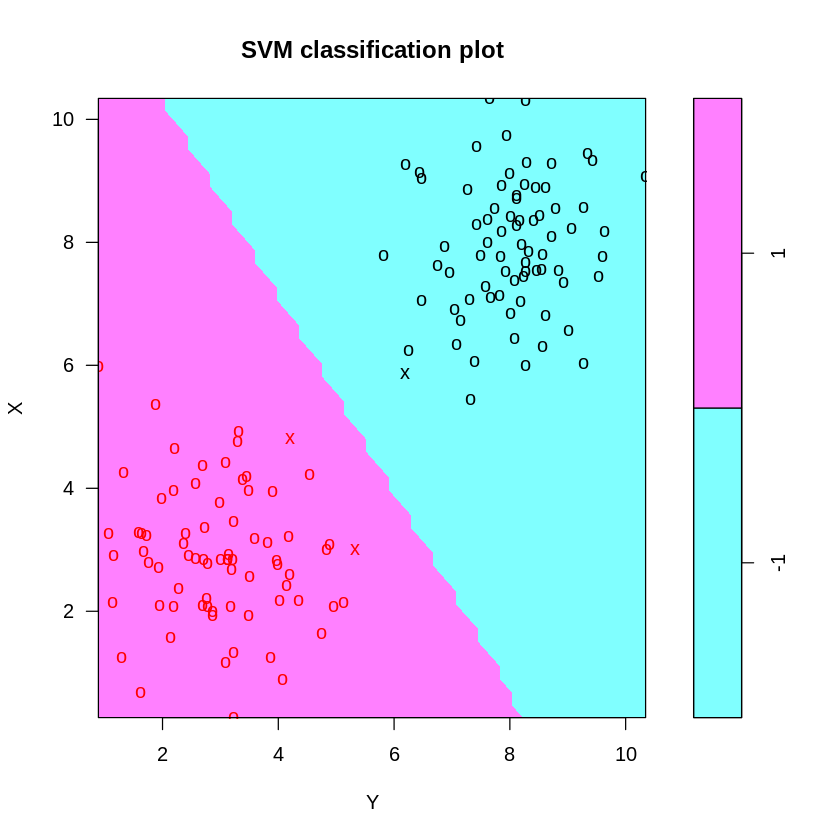

In [3]:
library(e1071)
library(caret)

svm_model1 = svm(class ~ ., data = points_data1, kernel = "linear", cost = 10, scale = FALSE)

summary(svm_model1)

plot(svm_model1, points_data1)
# Note that the second feature (Y) is plotted on the x-axis and the first feature (X) is plotted on 
# the y-axis, in contrast to the behavior of the usual plot() function in R. 

We trained the SVM with a *linear* kernel; and it learned a linear decision boundary. 
The "X" marks in the above plot are the data points that serve as **support vectors**. 
There are three of them. 
Let's compute the confusion matrix, and as expected, we'll get perfect accuracy.  

In [4]:
pred=predict(svm_model1, points_data1[,-3])
conftable1=table(predict=pred, class=points_data1$class)
conftable1

       class
predict -1  1
     -1 75  0
     1   0 75

In [5]:
# caret has a function to compute confusion matrix and 
# other things such as accuracy, sensitivity, specificity, etc.
confusionMatrix(data=pred, points_data1$class)

Confusion Matrix and Statistics

          Reference
Prediction -1  1
        -1 75  0
        1   0 75
                                     
               Accuracy : 1          
                 95% CI : (0.9757, 1)
    No Information Rate : 0.5        
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0        
            Specificity : 1.0        
         Pos Pred Value : 1.0        
         Neg Pred Value : 1.0        
             Prevalence : 0.5        
         Detection Rate : 0.5        
   Detection Prevalence : 0.5        
      Balanced Accuracy : 1.0        
                                     
       'Positive' Class : -1         
                                     

Let's apply the same to the second data set; **it's your turn.**

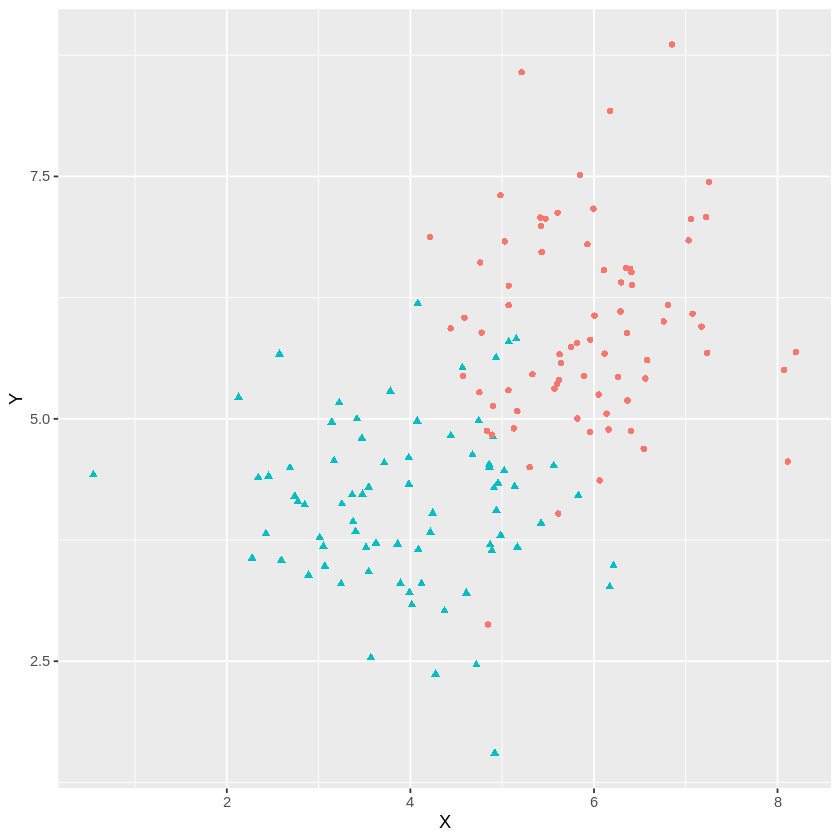

In [6]:
points_data2 <- read.csv("/dsa/data/all_datasets/toydata/data2.csv",header=TRUE)

points_data2$class <- factor(points_data2$class)
# Visualize the data
plot2 <- ggplot(points_data2, aes(X, Y)) + geom_point(aes(colour=factor(class),shape=factor(class))) + theme(legend.position="none")
plot2

In the above plot, you can see that there is an overlap between classes. 
This means that some of the samples of a class will be misclassified as the other class; 
these samples will be on the wrong side of the decision boundary. 
Let's see that. 


Call:
svm(formula = class ~ ., data = points_data2, kernel = "linear", 
    cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  31

 ( 15 16 )


Number of Classes:  2 

Levels: 
 -1 1




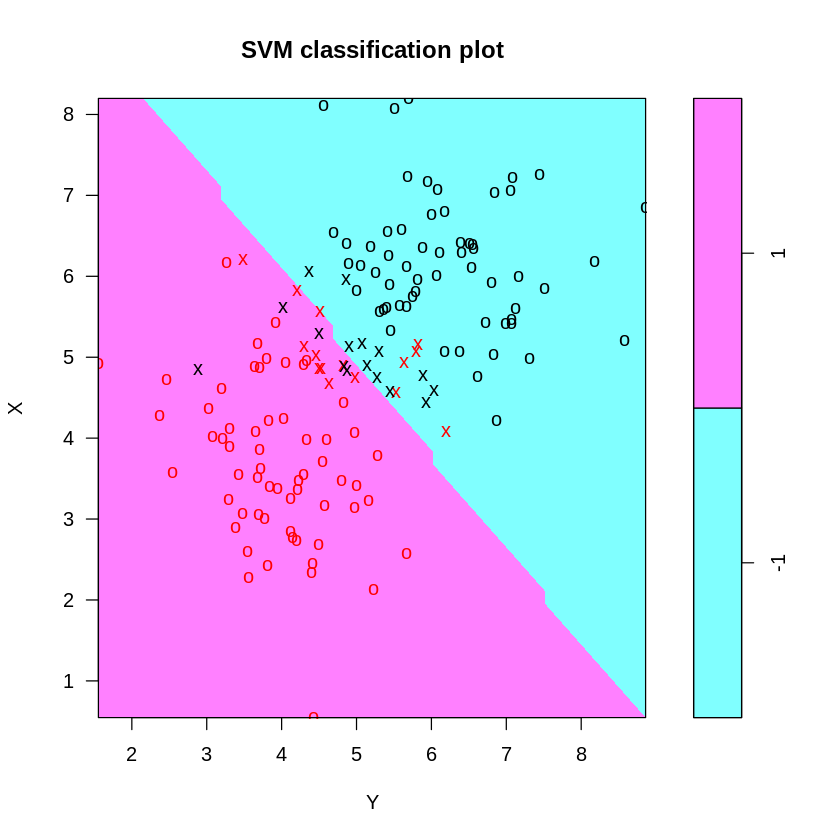

In [7]:
svm_model2 = svm(class ~ ., data = points_data2, kernel = "linear", cost = 10, scale = FALSE)
summary(svm_model2)
plot(svm_model2, points_data2)

Let's compute the confusion table. 
**Again, it's your turn.**

In [8]:
pred=predict(svm_model2, points_data2[,-3])
conftable2=table(predict=pred, class=points_data2$class)
conftable2
# or do this
confusionMatrix(data=pred, points_data2$class)

       class
predict -1  1
     -1 69  5
     1   6 70

Confusion Matrix and Statistics

          Reference
Prediction -1  1
        -1 69  5
        1   6 70
                                          
               Accuracy : 0.9267          
                 95% CI : (0.8726, 0.9628)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8533          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9200          
            Specificity : 0.9333          
         Pos Pred Value : 0.9324          
         Neg Pred Value : 0.9211          
             Prevalence : 0.5000          
         Detection Rate : 0.4600          
   Detection Prevalence : 0.4933          
      Balanced Accuracy : 0.9267          
                                          
       'Positive' Class : -1              
                                    

Now, we will apply the same to the third data set where classes are not linearly separable. 
**It's your turn:**

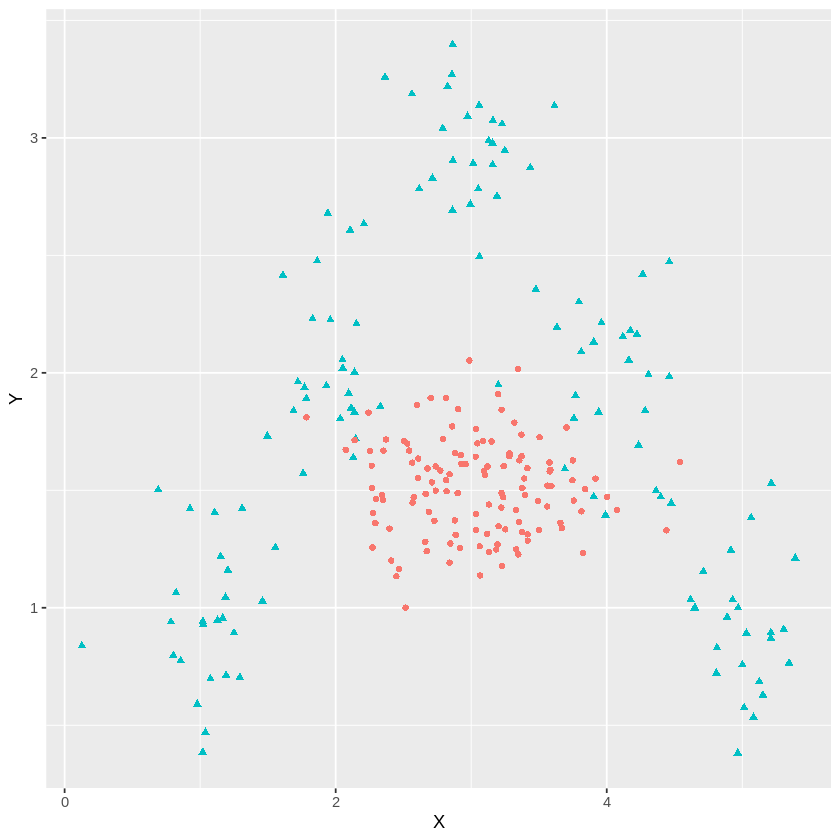

In [9]:
points_data3 <- read.csv("/dsa/data/all_datasets/toydata/data3.csv",header=TRUE)

points_data3$class <- factor(points_data3$class)
# Visualize the data
plot3 <- ggplot(points_data3, aes(X, Y)) + geom_point(aes(colour=factor(class),shape=factor(class))) + theme(legend.position="none")
plot3


Call:
svm(formula = class ~ ., data = points_data3, kernel = "linear", 
    cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  216

 ( 108 108 )


Number of Classes:  2 

Levels: 
 -1 1




       class
predict  -1   1
     -1 125  80
     1    0  45

Confusion Matrix and Statistics

          Reference
Prediction  -1   1
        -1 125  80
        1    0  45
                                          
               Accuracy : 0.68            
                 95% CI : (0.6183, 0.7374)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 6.38e-09        
                                          
                  Kappa : 0.36            
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.3600          
         Pos Pred Value : 0.6098          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5000          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.8200          
      Balanced Accuracy : 0.6800          
                                          
       'Positive' Class : -1              
                              

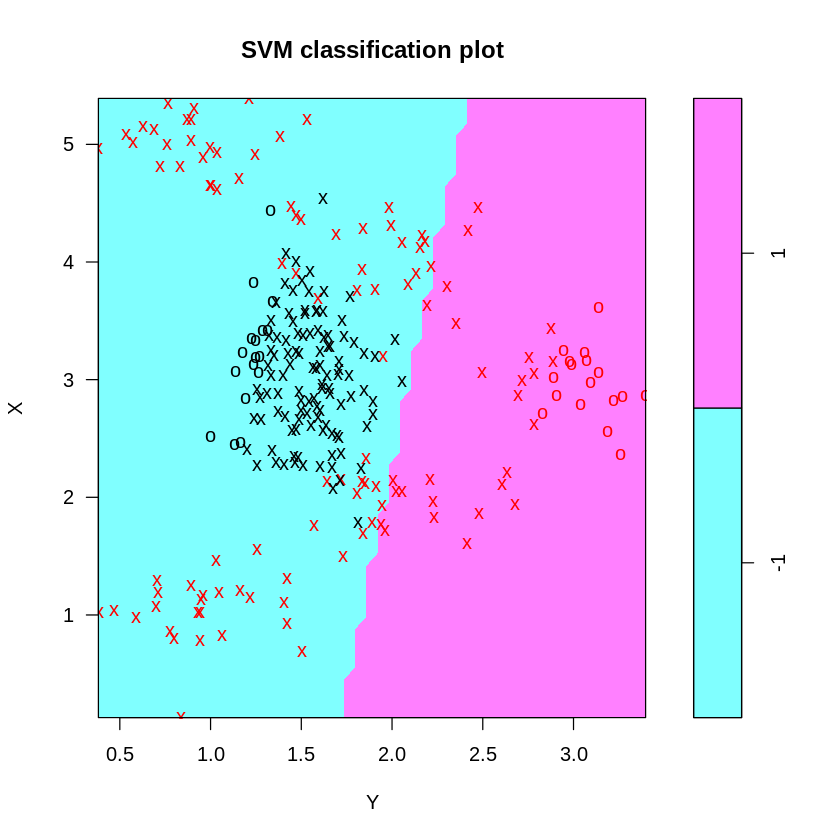

In [10]:
svm_model3 = svm(class ~ ., data = points_data3, kernel = "linear", cost = 10, scale = FALSE)
summary(svm_model3)
plot(svm_model3, points_data3)
pred=predict(svm_model3, points_data3[,-3])
conftable3=table(predict=pred, class=points_data3$class)
conftable3
# or do this
confusionMatrix(data=pred, points_data3$class)

This is pretty bad; SVM with a linear kernel can't classify this data set. 
Luckily there are nonlinear kernels that we can use with SVM. 
Let's try a **radial basis function (RBF)** kernel with SVM, it's one of the most used kernels.


Call:
svm(formula = class ~ ., data = points_data3, kernel = "radial", 
    cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 

Number of Support Vectors:  37

 ( 20 17 )


Number of Classes:  2 

Levels: 
 -1 1




       class
predict  -1   1
     -1 119   8
     1    6 117

Confusion Matrix and Statistics

          Reference
Prediction  -1   1
        -1 119   8
        1    6 117
                                         
               Accuracy : 0.944          
                 95% CI : (0.9078, 0.969)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.888          
                                         
 Mcnemar's Test P-Value : 0.7893         
                                         
            Sensitivity : 0.9520         
            Specificity : 0.9360         
         Pos Pred Value : 0.9370         
         Neg Pred Value : 0.9512         
             Prevalence : 0.5000         
         Detection Rate : 0.4760         
   Detection Prevalence : 0.5080         
      Balanced Accuracy : 0.9440         
                                         
       'Positive' Class : -1             
                                         

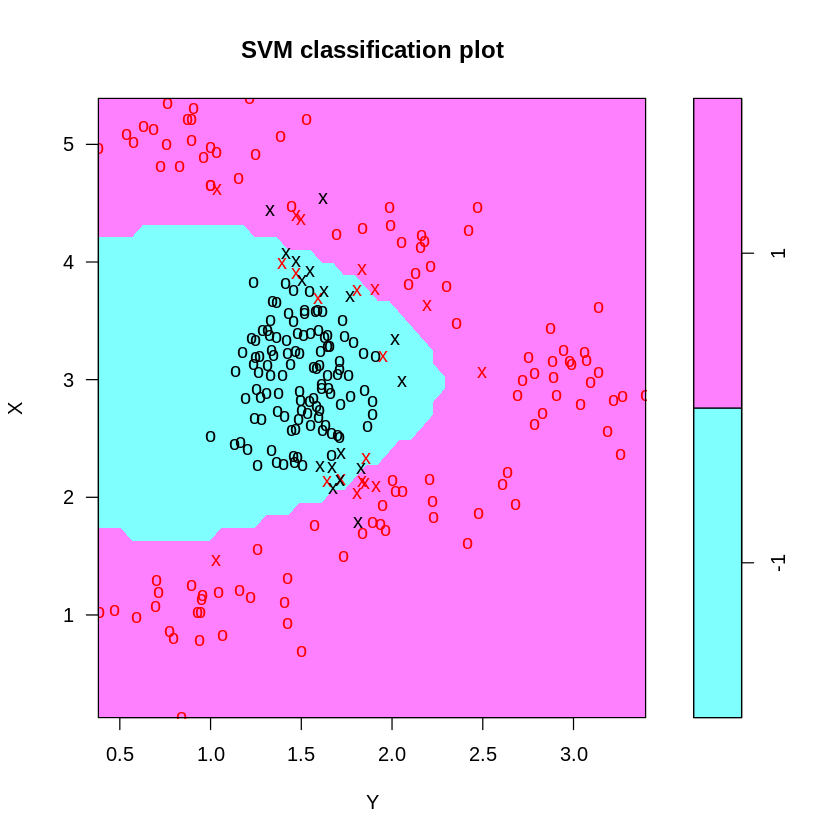

In [11]:
svm_model_rbf = svm(class ~ ., data=points_data3, kernel="radial", cost=10, scale=FALSE)
summary(svm_model_rbf)
plot(svm_model_rbf,points_data3)
pred=predict(svm_model_rbf, points_data3[,-3])
conftable_rbf=table(predict=pred, class=points_data3$class)
conftable_rbf

confusionMatrix(data=pred, points_data3$class)

As you can see, it does a pretty good job in classifying data; 
the decision boundary does not have to be linear any more, 
so this SVM model learns a boundary from the data that can be represented by radial basis functions. 


But there is a potential problem here. 
We trained and tested our model with the same exact data set. 
This can cause *memorization*; the model does not learn a decision boundary, 
it memorizes a boundary for this particular data set. 
We don't know how it will perform on the *new, unseen* observations. 
One of the most important aspects of learning algorithms is their ability to *generalize*; 
that is, to learn decision boundaries that are generalized enough to do well on unseen data. 

So, we need to separate our data set into a training subset and a testing subset; 
and train the model with the training set and test it 
(predict and compute the accuracy) with the testing set. 
There are different ways of it; we'll do two moethods: 1) split test, 2) cross-validation. 


<span style="color:#2e8dc9; font-size:18px; font-weight:700"> Split test </span>

Split test is simply splitting the data into training and testing sets; 
we can use 65% of the data for training, and the rest for testing 
(usually training set is larger than the testing set). 

Here's how we do it with caret library's functions: 


Call:
svm(formula = class ~ ., data = train_set, kernel = "radial", cost = 10, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 

Number of Support Vectors:  30

 ( 15 15 )


Number of Classes:  2 

Levels: 
 -1 1




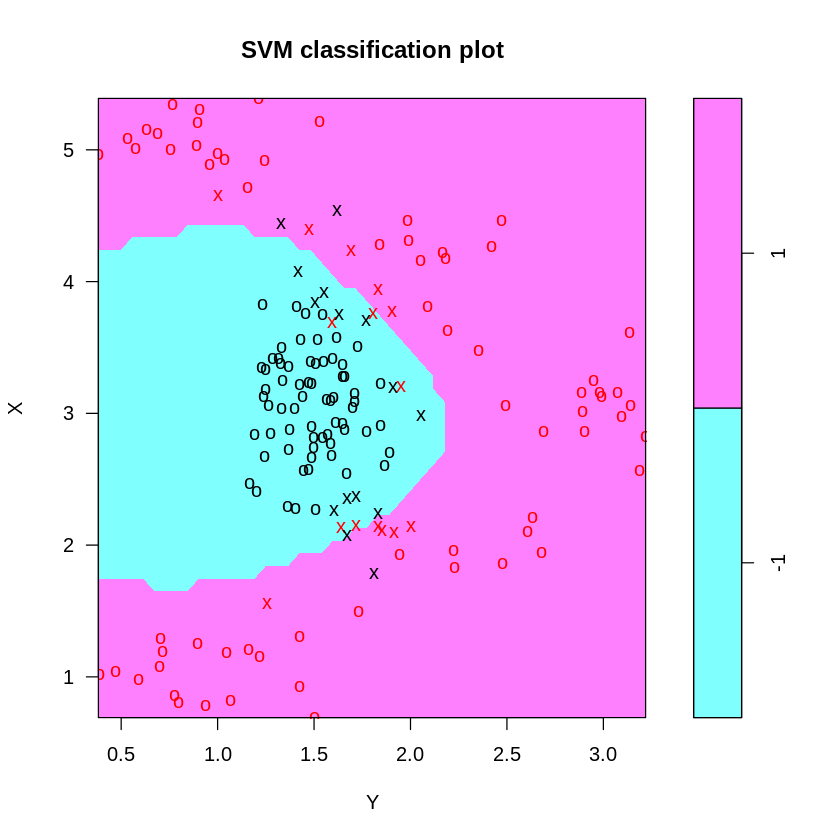

In [12]:
# define an 65%/35% train/test split of the dataset
split=0.65
# create indices that belong to the training set
trainIndex <- createDataPartition(points_data3$class, p=split, list=FALSE)
# pick the samples with those indices, they will be training set
train_set <- points_data3[trainIndex,]
# pick the rest of the samples, they will be testing set
test_set  <- points_data3[-trainIndex,]
# train a svm model with training set only
svm_model_rbf2 = svm(class ~ ., data=train_set, kernel="radial", cost=10, scale=FALSE)
summary(svm_model_rbf2)
plot(svm_model_rbf2,train_set)

In [13]:
# Now predict both training set and testing set outcomes of the model and compare.
predtr=predict(svm_model_rbf2, train_set[,-3])
predts=predict(svm_model_rbf2, test_set[,-3])

confusionMatrix(data=predtr, train_set$class)
confusionMatrix(data=predts, test_set$class)

Confusion Matrix and Statistics

          Reference
Prediction -1  1
        -1 77  4
        1   5 78
                                          
               Accuracy : 0.9451          
                 95% CI : (0.8984, 0.9746)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8902          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9390          
            Specificity : 0.9512          
         Pos Pred Value : 0.9506          
         Neg Pred Value : 0.9398          
             Prevalence : 0.5000          
         Detection Rate : 0.4695          
   Detection Prevalence : 0.4939          
      Balanced Accuracy : 0.9451          
                                          
       'Positive' Class : -1              
                                    

Confusion Matrix and Statistics

          Reference
Prediction -1  1
        -1 42  3
        1   1 40
                                          
               Accuracy : 0.9535          
                 95% CI : (0.8852, 0.9872)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.907           
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9767          
            Specificity : 0.9302          
         Pos Pred Value : 0.9333          
         Neg Pred Value : 0.9756          
             Prevalence : 0.5000          
         Detection Rate : 0.4884          
   Detection Prevalence : 0.5233          
      Balanced Accuracy : 0.9535          
                                          
       'Positive' Class : -1              
                                    

Usually, the model is expected to do a better job on predictions for the training set;
because that's what it has learned. 
If it has generalized well enough, it should also produce good performance for the testing set. 
The problem still continues though; 
how do we know that this particular training set represents the class distribution well enough? 
We need to repeat this split test a number of times and compute the mean and standard deviation of the accuracy.
We can do this with more random splittings, or we can use the cross-validation approach.

<span style="color:#2e8dc9; font-size:18px; font-weight:700">  k-fold cross-validation </span>

k-fold cross-validation splits the data set into *k* subsets (folds) and then picks one subset for
testing and trains the model with the remaining *k-1* subsets. 
It does this for each fold; so for k=10, it'll end up doing 10 training and testing sessions. 

We can use cross validation to **tune the parameters** of the SVM model to get a better accuracy 
without the danger of memorization. We will use svm tuning functions for that. 
Let's see how. 

In [14]:
# start the random number generator with some arbitrary seed
set.seed(42)

# Set up for cross validation:
# sampling = "cross" for cross-validation, 
# cross = 10 for 10-fold,
# retain the best model and save the performance measures
tctrl <- tune.control(sampling = "cross", cross = 10, best.model = TRUE, performances = TRUE)                     
 
# Now run the tune function to tune the parameters of the model 
# tune() will try to find the best parameters (gamma and cost) -- i.e., the parameters with the smallest error.
# it will try different gamma and cost values, given as arguments (e.g. cost=1, cost=10, cost=100, etc.)
tuned_params_cv <- tune(svm, class ~ ., data = points_data3, kernel = "radial", ranges = list(gamma = 10^(-6:-1), 
        cost = 10^(0:2)), tunecontrol = tctrl)
summary (tuned_params_cv)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1  100

- best performance: 0.052 

- Detailed performance results:
   gamma cost error dispersion
1  1e-06    1 0.568 0.06196773
2  1e-05    1 0.568 0.06196773
3  1e-04    1 0.568 0.06196773
4  1e-03    1 0.568 0.06196773
5  1e-02    1 0.360 0.09428090
6  1e-01    1 0.064 0.03373096
7  1e-06   10 0.568 0.06196773
8  1e-05   10 0.568 0.06196773
9  1e-04   10 0.568 0.06196773
10 1e-03   10 0.340 0.11352924
11 1e-02   10 0.152 0.07004760
12 1e-01   10 0.052 0.02699794
13 1e-06  100 0.568 0.06196773
14 1e-05  100 0.568 0.06196773
15 1e-04  100 0.340 0.11352924
16 1e-03  100 0.340 0.09475114
17 1e-02  100 0.060 0.02828427
18 1e-01  100 0.052 0.03293090



Call:
svm(formula = class ~ ., data = points_data3, kernel = "radial", 
    cost = 100, gamma = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 

Number of Support Vectors:  37

 ( 20 17 )


Number of Classes:  2 

Levels: 
 -1 1




Confusion Matrix and Statistics

          Reference
Prediction  -1   1
        -1 122   8
        1    3 117
                                          
               Accuracy : 0.956           
                 95% CI : (0.9226, 0.9778)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.912           
                                          
 Mcnemar's Test P-Value : 0.2278          
                                          
            Sensitivity : 0.9760          
            Specificity : 0.9360          
         Pos Pred Value : 0.9385          
         Neg Pred Value : 0.9750          
             Prevalence : 0.5000          
         Detection Rate : 0.4880          
   Detection Prevalence : 0.5200          
      Balanced Accuracy : 0.9560          
                                          
       'Positive' Class : -1              
                              

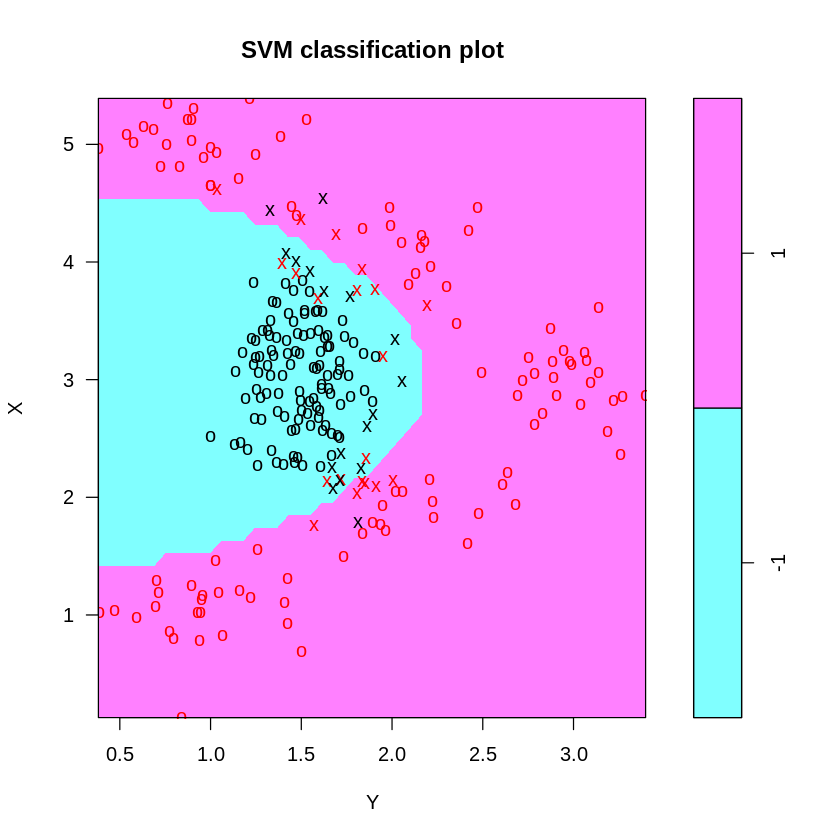

In [15]:
# gamma = 0.1 and cost = 100 are the best parameters
# now train a model with the tuned parameters.
svm_model_rbf_cv = svm(class ~ ., data = points_data3, kernel = "radial", cost = 100, gamma = 0.1, scale = FALSE)
summary(svm_model_rbf_cv)
plot(svm_model_rbf_cv,points_data3)

# find predictions 
pred = predict(svm_model_rbf_cv, points_data3[,-3])
confusionMatrix(data = pred, points_data3$class)


Call:
svm(formula = class ~ ., data = train_set, kernel = "radial", cost = 100, 
    gamma = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 

Number of Support Vectors:  28

 ( 14 14 )


Number of Classes:  2 

Levels: 
 -1 1




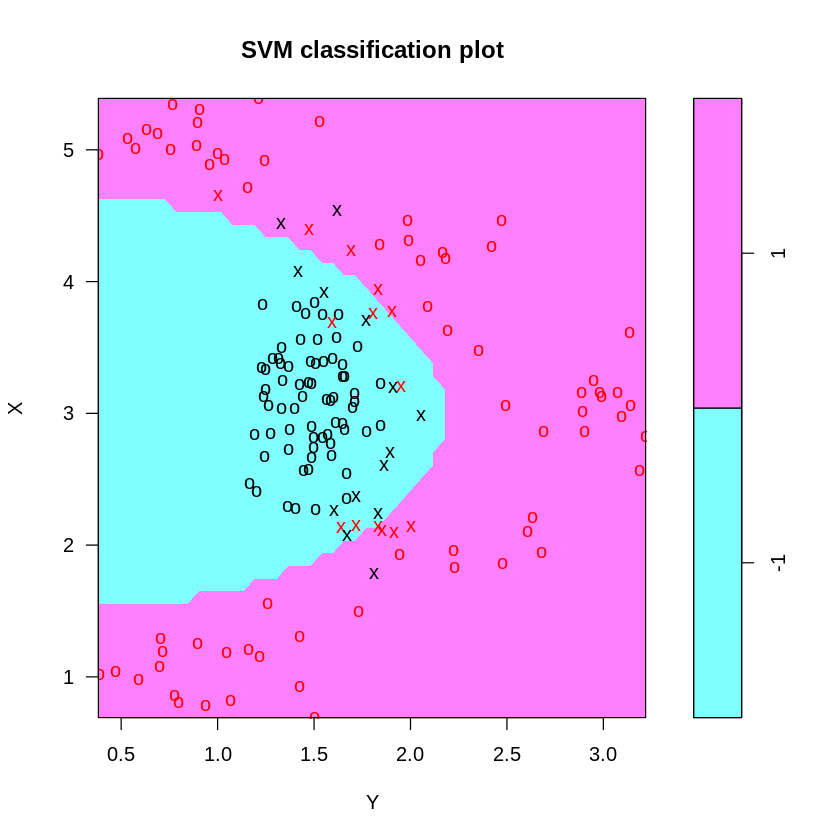

In [16]:
# We should really use the training and testing sets here. Even though we did cross validation, it was for 
# parameter tuning, let's train a model with the training set. 
svm_model_rbf_cv2 = svm(class ~ ., data = train_set, kernel = "radial", cost = 100, gamma = 0.1, scale = FALSE)
summary(svm_model_rbf_cv2)
plot(svm_model_rbf_cv2, train_set)

In [17]:
# Let's compare training and testing set accuracies. 
predtr=predict(svm_model_rbf_cv2, train_set[,-3])
predts=predict(svm_model_rbf_cv2, test_set[,-3])
confusionMatrix(data=predtr, train_set$class)
confusionMatrix(data=predts, test_set$class)

Confusion Matrix and Statistics

          Reference
Prediction -1  1
        -1 79  5
        1   3 77
                                          
               Accuracy : 0.9512          
                 95% CI : (0.9061, 0.9787)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9024          
                                          
 Mcnemar's Test P-Value : 0.7237          
                                          
            Sensitivity : 0.9634          
            Specificity : 0.9390          
         Pos Pred Value : 0.9405          
         Neg Pred Value : 0.9625          
             Prevalence : 0.5000          
         Detection Rate : 0.4817          
   Detection Prevalence : 0.5122          
      Balanced Accuracy : 0.9512          
                                          
       'Positive' Class : -1              
                                    

Confusion Matrix and Statistics

          Reference
Prediction -1  1
        -1 43  3
        1   0 40
                                          
               Accuracy : 0.9651          
                 95% CI : (0.9014, 0.9927)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9302          
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9302          
         Pos Pred Value : 0.9348          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5000          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.5349          
      Balanced Accuracy : 0.9651          
                                          
       'Positive' Class : -1              
                                    


We find the parameters with cross validation and use separate sets for training and testing, 
this way we have an accurate picture of classification performance of the model. 

Now, apply the same ideas to the "XOR pattern" data set where we have two classes that are 
linearly _nonseparable_ even though their samples seem to be nicely separated in the plot. 

**Again, it's your turn.** 
First do parameter tuning with 10-fold cross validation and then train model and test it just like above. 

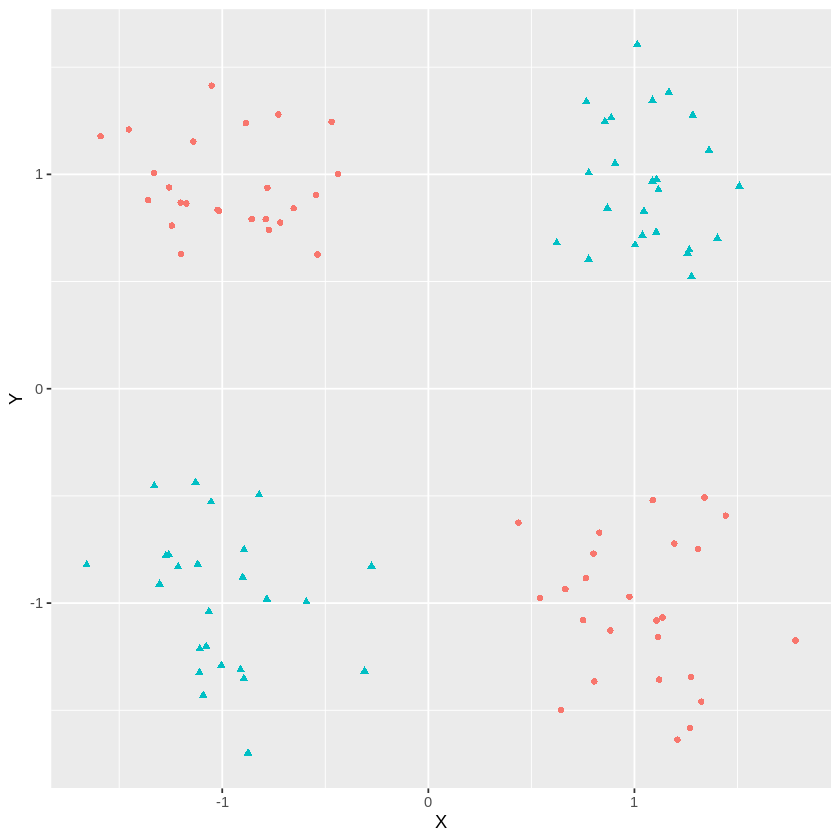

In [21]:
points_data4 <- read.csv("/dsa/data/all_datasets/toydata/data4.csv",header=TRUE)

points_data4$class <- factor(points_data4$class)
# Visualize the data
plot4 <- ggplot(points_data4, aes(X, Y)) + geom_point(aes(colour=factor(class),shape=factor(class))) + theme(legend.position="none")
plot4

In [22]:
tctrl <- tune.control(sampling = "cross", cross = 10, best.model = TRUE, performances = TRUE)                     
tuned_params_cv <- tune(svm, class ~ ., data = points_data4, kernel = "radial", ranges = list(gamma=10^(-6:-1), 
        cost=10^(0:2)), tunecontrol = tctrl)
summary(tuned_params_cv)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1    1

- best performance: 0 

- Detailed performance results:
   gamma cost error dispersion
1  1e-06    1  0.55  0.1080123
2  1e-05    1  0.55  0.1080123
3  1e-04    1  0.55  0.1080123
4  1e-03    1  0.54  0.1074968
5  1e-02    1  0.52  0.1135292
6  1e-01    1  0.00  0.0000000
7  1e-06   10  0.55  0.1080123
8  1e-05   10  0.55  0.1080123
9  1e-04   10  0.55  0.1080123
10 1e-03   10  0.54  0.1074968
11 1e-02   10  0.44  0.0843274
12 1e-01   10  0.00  0.0000000
13 1e-06  100  0.55  0.1080123
14 1e-05  100  0.55  0.1080123
15 1e-04  100  0.55  0.1080123
16 1e-03  100  0.53  0.1418136
17 1e-02  100  0.00  0.0000000
18 1e-01  100  0.00  0.0000000



Call:
svm(formula = class ~ ., data = train_set, kernel = "radial", cost = 10, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




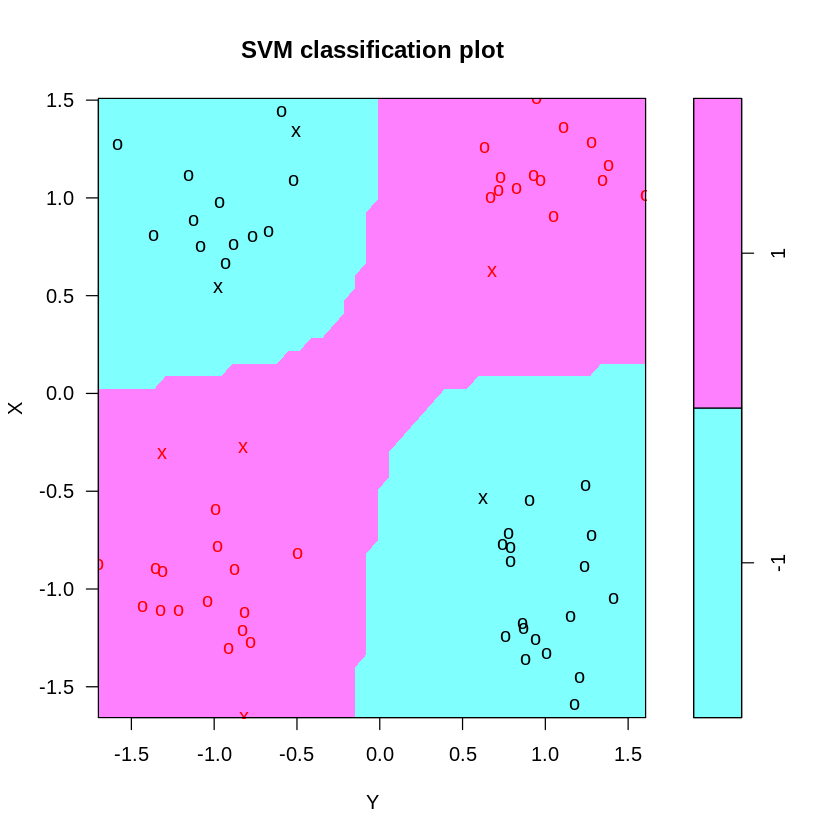

In [24]:
# create training and testing sets
split=0.65
trainIndex <- createDataPartition(points_data4$class, p=split, list=FALSE)
train_set <- points_data4[trainIndex,]
test_set  <- points_data4[-trainIndex,]

# train a svm model with training set only
svm_model_4 = svm(class ~ ., data=train_set, kernel="radial", cost=10, scale=FALSE)
summary(svm_model_4)
plot(svm_model_4,train_set)

In [25]:
predtr=predict(svm_model_4, train_set[,-3])
predts=predict(svm_model_4, test_set[,-3])
confusionMatrix(data=predtr, train_set$class)
confusionMatrix(data=predts, test_set$class)

Confusion Matrix and Statistics

          Reference
Prediction -1  1
        -1 33  0
        1   0 33
                                     
               Accuracy : 1          
                 95% CI : (0.9456, 1)
    No Information Rate : 0.5        
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0        
            Specificity : 1.0        
         Pos Pred Value : 1.0        
         Neg Pred Value : 1.0        
             Prevalence : 0.5        
         Detection Rate : 0.5        
   Detection Prevalence : 0.5        
      Balanced Accuracy : 1.0        
                                     
       'Positive' Class : -1         
                                     

Confusion Matrix and Statistics

          Reference
Prediction -1  1
        -1 17  0
        1   0 17
                                     
               Accuracy : 1          
                 95% CI : (0.8972, 1)
    No Information Rate : 0.5        
    P-Value [Acc > NIR] : 5.821e-11  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0        
            Specificity : 1.0        
         Pos Pred Value : 1.0        
         Neg Pred Value : 1.0        
             Prevalence : 0.5        
         Detection Rate : 0.5        
   Detection Prevalence : 0.5        
      Balanced Accuracy : 1.0        
                                     
       'Positive' Class : -1         
                                     

# Save your notebook!

Keep in mind that you should convert categorical variables to factors 
(just like we did in the above examples with the class variable) when using SVM. 

Here are some links to dig deeper: 

[A tour of machine learning algorithms](http://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/)

[Comparing machine learning classifiers](http://tjo-en.hatenablog.com/entry/2014/01/06/234155)

[Training and testing concepts 1](http://machinelearningmastery.com/how-to-choose-the-right-test-options-when-evaluating-machine-learning-algorithms/)

[Training and testing concepts 2](http://machinelearningmastery.com/how-to-estimate-model-accuracy-in-r-using-the-caret-package/)